<a href="https://colab.research.google.com/github/pas3n7/ColabDataScienceLearning/blob/main/Distributional_Financial_Accounts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [217]:
import pandas as pd
import matplotlib.pyplot as plt
!pip install pandas_alive
import pandas_alive
download = False

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: attrs
    Found existing installation: attrs 21.4.0
    Uninstalling attrs-21.4.0:
      Successfully uninstalled attrs-21.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [166]:
 if download:
    !wget "https://www.federalreserve.gov/releases/z1/dataviz/download/zips/dfa.zip"
    !unzip dfa.zip
    !ls

In [167]:
genworth = pd.read_csv("/content/dfa-generation-levels-detail.csv")
genworth['Date'] = pd.PeriodIndex(genworth['Date'].str.replace(':', '-'), freq='Q').to_timestamp()
toplot = genworth.set_index(['Date','Category'])

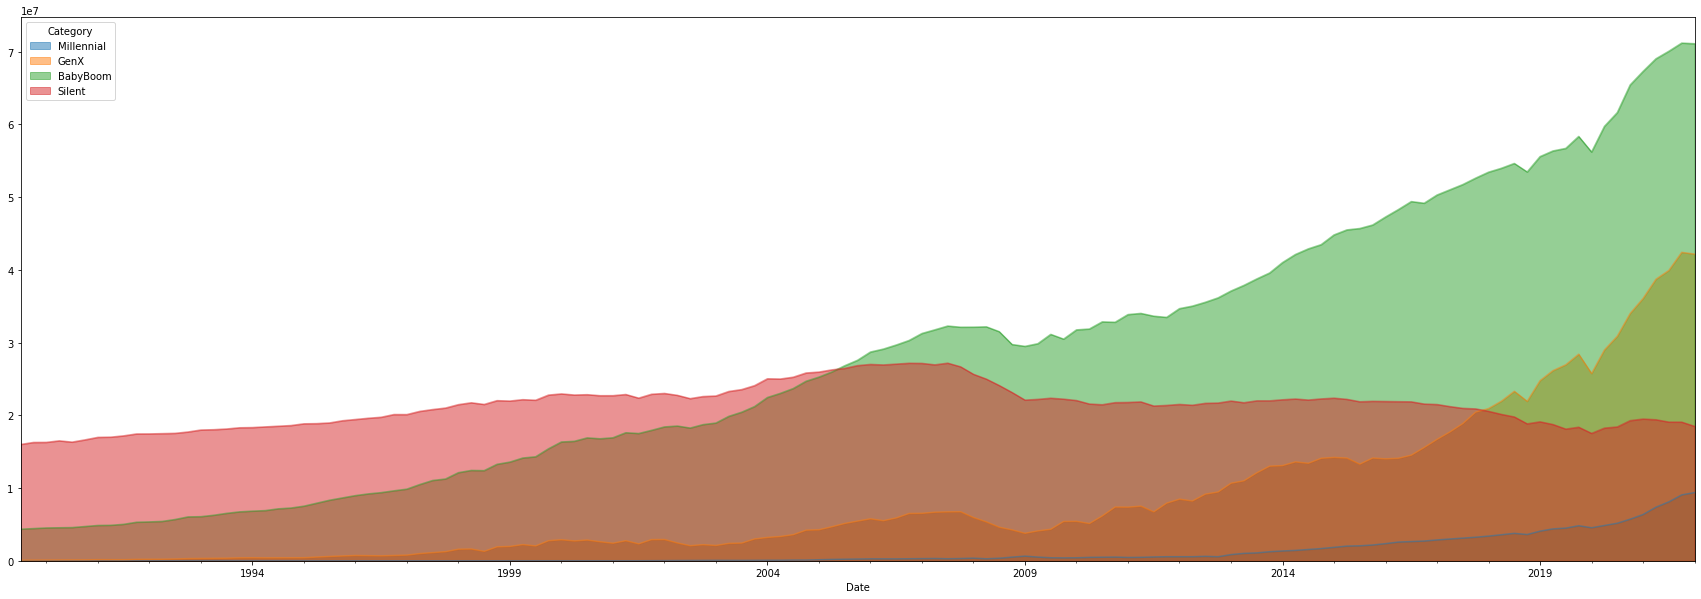

In [233]:
#@title Select Category { run: "auto" }
dropdown = 'Net worth' #@param ['Assets', 'Nonfinancial assets', 'Real estate', 'Consumer durables','Financial assets', 'Checkable deposits and currency',       'Time deposits and short-term investments', 'Money market fund shares',       'Debt securities', 'U.S. government and municipal securities',       'Corporate and foreign bonds', 'Loans (Assets)',       'Other loans and advances (Assets)', 'Mortgages',       'Corporate equities and mutual fund shares', 'Life insurance reserves',       'Pension entitlements', 'Equity in noncorporate business',       'Miscellaneous assets', 'Liabilities', 'Loans (Liabilities)',       'Home mortgages', 'Consumer credit',       'Depository institutions loans n.e.c.',       'Other loans and advances (Liabilities)',       'Deferred and unpaid life insurance premiums', 'Net worth',       'Household count']
theplot = toplot[dropdown].unstack()[['Millennial', 'GenX', 'BabyBoom', 'Silent']].plot(kind="area", stacked=False, legend=True, figsize=(30,10))

In [256]:
#pandas_alive takes a period length, we want to specify seconds of the total length of the animation instead
animlength = 1000* 15 #time in miliseconds for animation to last (seconds * 1000)
plen = animlength // toplot.shape[0] 

14672

In [257]:
toplot[dropdown].unstack()[['Millennial', 'GenX', 'BabyBoom', 'Silent']].plot_animated(filename='networth.gif', period_fmt='%Y',interpolate_period=False, steps_per_period=1, period_length=plen)

Generating BarChartRace, plotting ['Millennial', 'GenX', 'BabyBoom', 'Silent']


BarChartRace(df=Category    Millennial      GenX  BabyBoom    Silent
Date                                                
1989-07-01           0     78417   4347110  15992455
1989-10-01           0     93426   4436593  16270108
1990-01-01           0     97702   4520201  16281284
1990-04-01           0    116263   4549578  16492937
1990-07-01           0    120400   4572234  16317229
...                ...       ...       ...       ...
2021-01-01     6362985  36063564  67275996  19487899
2021-04-01     7370045  38710756  69010903  19392408
2021-07-01     8100654  39911119  70043112  19069703
2021-10-01     9062343  42402928  71168385  19064269
2022-01-01     9379764  42163758  71082708  18482217

[131 rows x 4 columns], interpolate_period=False, steps_per_period=1, period_length=28, period_fmt='%Y', figsize=array([6.5, 3.5]), title=None, fig=<Figure size 936x504 with 1 Axes>, cmap='dark24', tick_label_size=7, period_label=True, period_summary_func=None, fixed_max=False, dpi=144, writer

In [258]:
!ls *.gif

networth.gif  test1.gif


In [259]:
from google.colab import files
files.download('networth.gif')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>